In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("file_to_use_comparison.csv")

## chatgpt code

In [3]:

# Use the 'comment_body' column for topic modeling
comments = df['main_body'].dropna().tolist()

# Create a CountVectorizer to convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(comments)

# Define the number of topics
n_topics = 4

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

# Extract the topics and words
words = vectorizer.get_feature_names_out()
topics = {}

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[-10:][::-1]  # Get indices of top 10 words
    top_words = [words[i] for i in top_words_indices]
    topics[f"Topic {topic_idx + 1}"] = top_words

# Convert the topics into a DataFrame for better readability
topics_df = pd.DataFrame(topics)

# Display the DataFrame
print("Extracted Topics:")
print(topics_df)


NameError: name 'df' is not defined

In [ ]:
# Insta

In [4]:
df = pd.read_csv("nasa_output_labels.csv")

In [6]:

# Use the 'comment_body' column for topic modeling
comments = df['Image Label'].dropna().tolist()

# Create a CountVectorizer to convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(comments)

# Define the number of topics
n_topics = 4

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

# Extract the topics and words
words = vectorizer.get_feature_names_out()
topics = {}

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[-10:][::-1]  # Get indices of top 10 words
    top_words = [words[i] for i in top_words_indices]
    topics[f"Topic {topic_idx + 1}"] = top_words

# Convert the topics into a DataFrame for better readability
topics_df = pd.DataFrame(topics)

# Display the DataFrame
print("Extracted Topics:")
print(topics_df)


Extracted Topics:
     Topic 1  Topic 2 Topic 3     Topic 4
0     arafed    large    star        view
1  satellite     nasa  bright       space
2       view  picture   close  background
3      smoke   object     sky       close
4     rocket      sky  galaxy        moon
5      image    close  center       earth
6        air     star  filled       black
7      earth   middle  arafed      planet
8       lake   starry   image     station
9  launching   single    blue       white


Topic 1: Space Missions and Objects

Topic 2: Celestial Bodies and Sky

Topic 3: Visual Descriptions and Landscapes

Topic 4: Views of Space and Earth

In [21]:
topic_map = {0:'Space missions and objects',
             1: 'Celestial bodies and sky',
             2: 'Visual descriptions and landscapes',
             3: 'Views of space and earth'}

In [22]:
# Assign topic labels based on dominant topic in each document
# Get topic distribution for each document
topic_distributions = lda_model.transform(dtm)

# Assign the dominant topic for each document (the topic with the highest probability)
df["dominant_topic"] = np.argmax(topic_distributions, axis=1)

In [23]:
df["dominant_topic_name"] = df["dominant_topic"].map(topic_map)

In [24]:
df['n_likes'] = df['Like Count'].str.replace("likes","").str.replace(",","").astype(int)

In [26]:
df.groupby('dominant_topic_name')['n_likes'].mean().round()

dominant_topic_name
Celestial bodies and sky              341645.0
Space missions and objects            414101.0
Views of space and earth              992279.0
Visual descriptions and landscapes    771731.0
Name: n_likes, dtype: float64

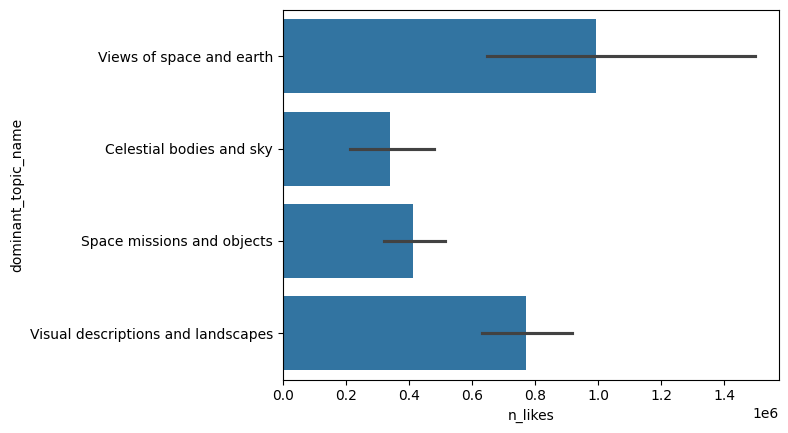

In [34]:
sns.barplot(y=df["dominant_topic_name"], x=df["n_likes"], estimator="mean" )
plt.show()

1. User engagement is measured by the number of the likes on the image
2. Images related to **Views of space and earth** and **Visual descriptions and landscapes** got the **highest** user engagement 
3. Images related to **Celestial bodies and sky** and **Space missions and objects** got the **lowest** user engagement

In [35]:
df = pd.read_csv("isro_output_labels (2).csv")

In [36]:
# Use the 'comment_body' column for topic modeling
comments = df['Caption'].dropna().tolist()

# Create a CountVectorizer to convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(comments)

# Define the number of topics
n_topics = 4

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

# Extract the topics and words
words = vectorizer.get_feature_names_out()
topics = {}

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[-10:][::-1]  # Get indices of top 10 words
    top_words = [words[i] for i in top_words_indices]
    topics[f"Topic {topic_idx + 1}"] = top_words

# Convert the topics into a DataFrame for better readability
topics_df = pd.DataFrame(topics)

# Display the DataFrame
print("Extracted Topics:")
print(topics_df)


Extracted Topics:
                Topic 1   Topic 2           Topic 3           Topic 4
0                    और      isro             space              2024
1                    तर  somanath               day               day
2                    वस  chairman          national             space
3                  isro        dr              2024          national
4  nationalspaceday2024   answers             india             https
5                    शन      shri  ddrjitendrasingh              live
6               contest     space              moon  ddrjitendrasingh
7       shivshaktipoint  explains              days               www
8                trivia  question              isro            august
9          chandrayaan3    indian           landing           youtube


In [37]:

# Use the 'comment_body' column for topic modeling
comments = df['Image Label'].dropna().tolist()

# Create a CountVectorizer to convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(comments)

# Define the number of topics
n_topics = 4

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

# Extract the topics and words
words = vectorizer.get_feature_names_out()
topics = {}

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[-10:][::-1]  # Get indices of top 10 words
    top_words = [words[i] for i in top_words_indices]
    topics[f"Topic {topic_idx + 1}"] = top_words

# Convert the topics into a DataFrame for better readability
topics_df = pd.DataFrame(topics)

# Display the DataFrame
print("Extracted Topics:")
print(topics_df)


Extracted Topics:
   Topic 1  Topic 2     Topic 3     Topic 4
0    quote   poster  background         man
1    space  picture       close        vest
2  picture      man      rocket      arafed
3  station  message        blue     glasses
4    close     moon       black     sitting
5  talking   planet        cell         tie
6   camera    space       phone       close
7   person   arafed         man       hands
8     star    close        logo      poster
9    field  shuttle       space  microphone


Topic 1: Conversations and Visual Representations

Topic 2: Space Imagery and People

Topic 3: Space Exploration and Technical Scenes

Topic 4: People and Professional Appearance

In [47]:
topic_map={0:"Conversations and visual representations",
           1:"Space imagery and people",
           2: "Space exploration and technical scenes",
           3:"People and professional appearance"}

In [48]:
# Assign topic labels based on dominant topic in each document
# Get topic distribution for each document
topic_distributions = lda_model.transform(dtm)

# Assign the dominant topic for each document (the topic with the highest probability)
df["dominant_topic"] = np.argmax(topic_distributions, axis=1)

In [49]:
df["dominant_topic_name"] = df["dominant_topic"].map(topic_map)

In [50]:
df['n_likes'] = df['Like Count'].str.replace("likes","").str.replace(",","").astype(int)

In [51]:
df.groupby('dominant_topic_name')['n_likes'].mean().round()

dominant_topic_name
Conversations and visual representations     7180.0
People and professional appearance           4334.0
Space exploration and technical scenes      11842.0
Space imagery and people                    10230.0
Name: n_likes, dtype: float64

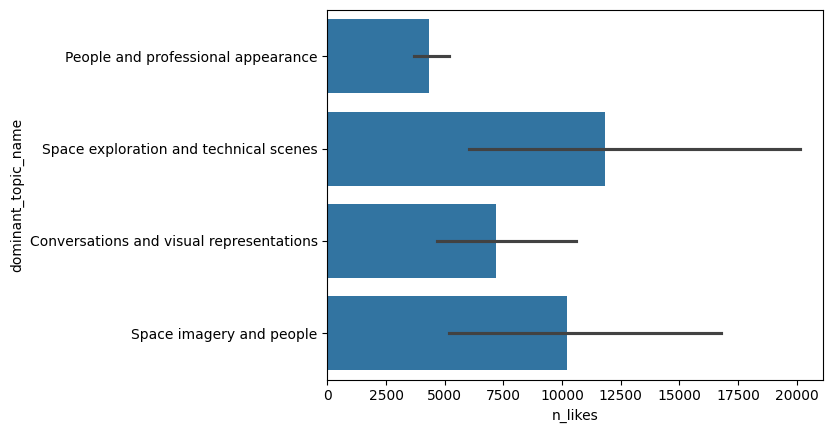

In [52]:
sns.barplot(y=df["dominant_topic_name"], x=df["n_likes"], estimator="mean" )
plt.show()

1. Images related to **Space exploration and technical scenes** and **Space imagery and people** got the highest user engagement
2. Images related to **People and professional appearance** and **Conversations and visual representations** got the lowest user engagement

#### Based on the topics/categories and the corresponding user engagement levels on images posted by NASA and ISRO, we can infer that
1. Users are more interested to see the space imagery and media content about space exploration
2. Images about scientists or professionals and their conversations draw less engagement from users